# Laboratorio 6 – Clasificación de malware con DL

In [ ]:
#Imports
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import collections
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.constraints import maxnorm
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
#Montaje de google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##PARTE 1

In [ ]:
batch_size = 32
img_height = 128
img_width = 128

In [ ]:
DATA_DIRECTORY = '/content/drive/MyDrive/B'

In [ ]:
#Keras API
dataset = tf.keras.utils.image_dataset_from_directory(
  DATA_DIRECTORY,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 9339 files belonging to 25 classes.


In [ ]:
#Clases 
class_names = dataset.class_names
print(class_names)

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


In [ ]:
def get_class_distribution(dataset):
    class_distribution = {}
    for element in dataset.as_numpy_iterator():
        label = element[1][0]

        try:
            class_distribution[label] += 1
        except:
            class_distribution[label] = 0

    class_distribution = collections.OrderedDict(sorted(class_distribution.items())) 
    return class_distribution

In [ ]:
class_distribution = get_class_distribution(dataset)

In [ ]:
#Distribucion por clases de img
for i in range(len(class_names)):
    name = class_names[i]
    dist = class_distribution[i]
    print(name, " " * (15 - len(name)), dist)

Adialer.C        4
Agent.FYI        1
Allaple.A        82
Allaple.L        49
Alueron.gen!J    9
Autorun.K        4
C2LOP.P          5
C2LOP.gen!g      4
Dialplatform.B   3
Dontovo.A        3
Fakerean         8
Instantaccess    17
Lolyda.AA1       7
Lolyda.AA2       1
Lolyda.AA3       1
Lolyda.AT        9
Malex.gen!J      7
Obfuscator.AD    1
Rbot!gen         2
Skintrim.N       4
Swizzor.gen!E    8
Swizzor.gen!I    4
VB.AT            12
Wintrim.BX       2
Yuner.A          20


##PARTE 2

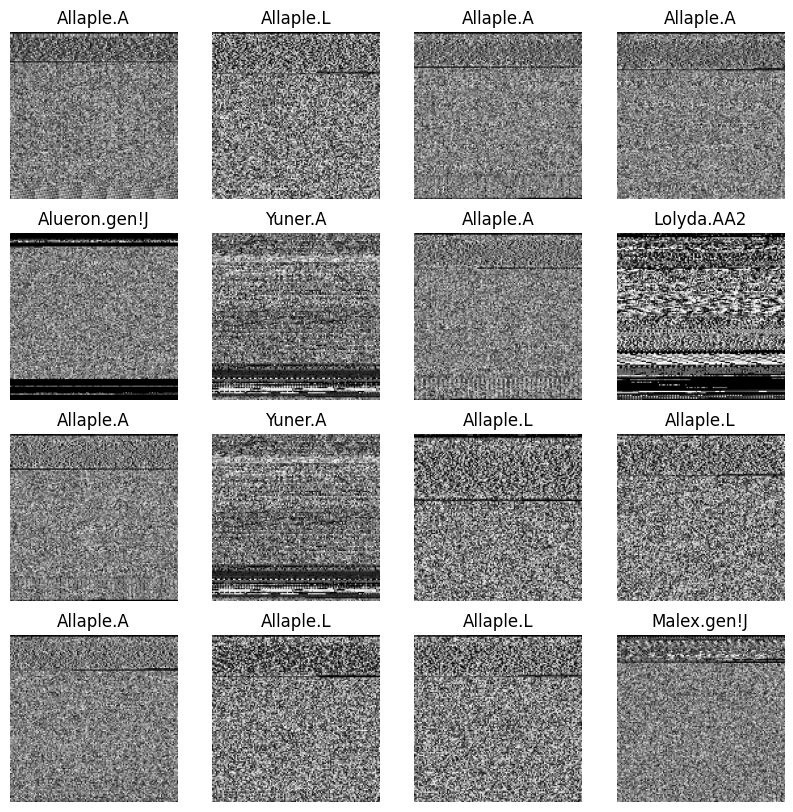

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

##PARTE 3

In [ ]:
path_images = ImageDataGenerator().flow_from_directory(directory=DATA_DIRECTORY, target_size=(128,128), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [ ]:
images, marks = next(path_images)

In [ ]:
indices_path = path_images.class_indices

In [ ]:
type_images = indices_path.keys()

In [ ]:
for x in marks.shape:
    print(x)

9339
25


In [ ]:
add = sum(marks)
marks_qt = marks.shape[0]

In [ ]:
quantity = ((add)/marks_qt)

In [ ]:
#Red neuronal
quantity = quantity*100
quantity

array([ 1.3063496 ,  1.2421031 , 31.577257  , 17.036085  ,  2.1201413 ,
        1.1350251 ,  1.5633365 ,  2.141557  ,  1.895278  ,  1.7346611 ,
        4.079666  ,  4.615055  ,  2.2807581 ,  1.9702322 ,  1.3170575 ,
        1.7025378 ,  1.4562588 ,  1.5205053 ,  1.6918299 ,  0.85662276,
        1.3705964 ,  1.4134276 ,  4.3687763 ,  1.038655  ,  8.566228  ],
      dtype=float32)

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

##PARTE 4

In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy', 'MeanSquaredError']
)

In [ ]:
#Model resume
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 flatten_2 (Flatten)         (None, 1016064)           0         
                                                                 
 dense_4 (Dense)             (None, 64)                65028160  
                                                                 
 dense_5 (Dense)             (None, 25)                1625      
                                                                 
Total params: 65,049,177
Trainable params: 65,049,177
Non-trainable params: 0
_________________________________________________________________


##PARTE 5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images/255.,marks, test_size=0.3)

In [ ]:
#train de X
X_train.shape
X_train.size

321306624

In [ ]:
#test de X
X_test.shape
X_test.size

137723904

In [ ]:
#train de Y
y_train.shape
y_train.size

163425

In [ ]:
#test de Y
y_test.shape
y_test.size

70050

##PARTE 6

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(25, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 128)      

##PARTE 7

In [ ]:
model.layers

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [ ]:
op = model.evaluate(X_test, y_test)
print("Accuracy ", op[1])

88/88 [==============================] - 70s 784ms/step - loss: 3.1820 - accuracy: 0.2645
Accuracy  0.2644539475440979


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
205/205 [==============================] - 734s 4s/step - loss: 0.8879 - accuracy: 0.7523 - val_loss: 1.1631 - val_accuracy: 0.9411
Epoch 2/4
205/205 [==============================] - 751s 4s/step - loss: 0.1546 - accuracy: 0.9514 - val_loss: 0.2621 - val_accuracy: 0.9236
Epoch 3/4
205/205 [==============================] - 711s 3s/step - loss: 0.0768 - accuracy: 0.9749 - val_loss: 0.1058 - val_accuracy: 0.9672
Epoch 4/4
205/205 [==============================] - 727s 4s/step - loss: 0.0535 - accuracy: 0.9842 - val_loss: 0.1050 - val_accuracy: 0.9693


In [ ]:
type_images

dict_keys(['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A'])

In [ ]:
y_pred=model.predict(X_test)

88/88 [==============================] - 68s 771ms/step


In [ ]:
test_predict = np.argmax(model.predict(X_test), axis=-1)

88/88 [==============================] - 69s 783ms/step


In [ ]:
target_test = np.argmax(y_test, axis=-1)

##PARTE 8

In [ ]:
cm = confusion_matrix(target_test, test_predict)
cm

array([[ 42,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 862,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 491,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  63,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  34],
       [  0,   0,   0,   0,   0,   0,  34,  11,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   0,   1,   0,   0],
      

In [ ]:
print(classification_report(test_predict, target_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00       864
           3       1.00      1.00      1.00       491
           4       1.00      1.00      1.00        63
           5       0.00      0.00      0.00         0
           6       0.72      0.85      0.78        40
           7       0.95      0.76      0.84        71
           8       1.00      1.00      1.00        40
           9       1.00      0.98      0.99        60
          10       0.98      0.98      0.98       118
          11       1.00      1.00      1.00       122
          12       1.00      1.00      1.00        55
          13       1.00      1.00      1.00        51
          14       1.00      1.00      1.00        34
          15       0.97      1.00      0.99        39
          16       1.00      1.00      1.00        40
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Discusion

Segun las metricas se obtuvo un accrurancy del 97% esto es bastante positivo ya que nos demuestra la alta calidad del modelo y tambien su desempeño en la clasificacion del malware luego de ser evaluado y su implentacion con el dataset de pruebas.